 ## 얼굴 전체색을 대표하는 안면부위 관련 가설검증
 
    최초 작성일 : 2020/03/08
    작성자 : 조예슬 
    
    + 카이제곱
      : 범주형 자료로 구성된 데이터 분석에 이용
      : 적합도 검정 : 관찰된 비율값이 기대값과 같은지 조사하는 검정(어떤 모집단의 표본이 그 모집단을 대표하는지 검정)
      : 동질성 검정 : 두 집단의 분포가 동일한지 검정
          : 독립성 검정 : 두 개 이상의 변수가 서로 독립인지 검정 
 
    < 작성 내용 >
    
        - 설문조사 결과 그래프로 시각화
        
        - 성별에 따른 안면부위 인식 차이
        
        - 연령에 따른 안면부위 인식 차이
        
        - 패션 관심도에 따른 안면부위 인식 차이
        
        
    < 수정 내용 >
    
        20/03/21
        - 귀무가설, 대립가설 내용 수정

### 설문조사 결과를 토대로 얼굴 전체색 대표 안면부위 설정

In [1]:
# 데이터 불러오기

face_region <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/face_region.csv")
str(face_region)
head(face_region)

'data.frame':	1680 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ region: Factor w/ 5 levels "cheek","chin",..: 1 5 4 5 2 5 2 5 1 2 ...
 $ class : Factor w/ 4 levels "sample1","sample2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,region,class,cnt
0,cheek,sample1,1
1,forehead,sample1,1
2,face,sample1,1
3,forehead,sample1,1
4,chin,sample1,1
5,forehead,sample1,1


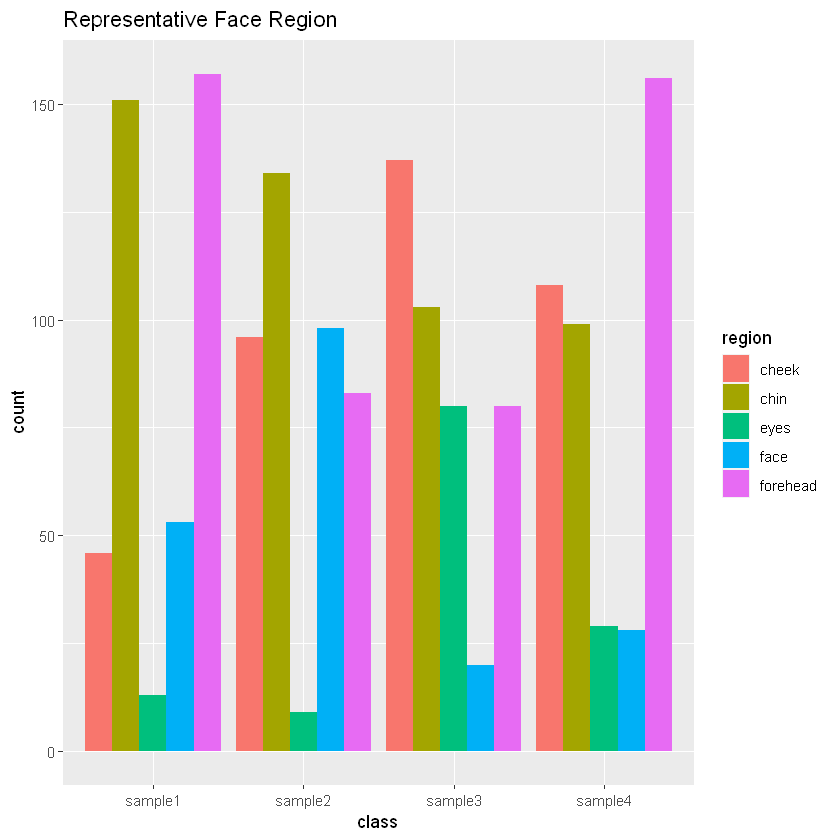

In [16]:
# 그래프로 상태 먼저 확인

# install.packages("ggplot2")
library("ggplot2")

# 각 샘플마다 나눠서 보기
ggplot(face_region, aes(class, fill=region)) + geom_bar(position="dodge") + labs(title = "Representative Face Region")
# 어떻게 이렇게까지 결과 일치가 안되냐ㅋㅋㅋㅋㅋ

In [52]:
# 전체결과보기 위한 dataframe 새로 만들기

t_cheek <- with(face_region, sum(cnt[region== "cheek"]))
t_forehead <- with(face_region, sum(cnt[region== "forehead"]))
t_chin <- with(face_region, sum(cnt[region== "chin"]))
t_eyes <- with(face_region, sum(cnt[region== "eyes"]))
t_face <- with(face_region, sum(cnt[region== "face"]))

# column 만들기
total <- c(t_cheek, t_forehead, t_chin, t_eyes, t_face)

# dataframe 만들기
df_total_faceregion <- data.frame(total)
rownames(df_total_faceregion) <- c("cheek", "forehead", "chin", "eyes", "face")
library(tibble)
df_total_faceregion2 <- rownames_to_column(df_total_faceregion, var="face_region")
df_total_faceregion2

face_region,total
cheek,387
forehead,476
chin,487
eyes,131
face,199


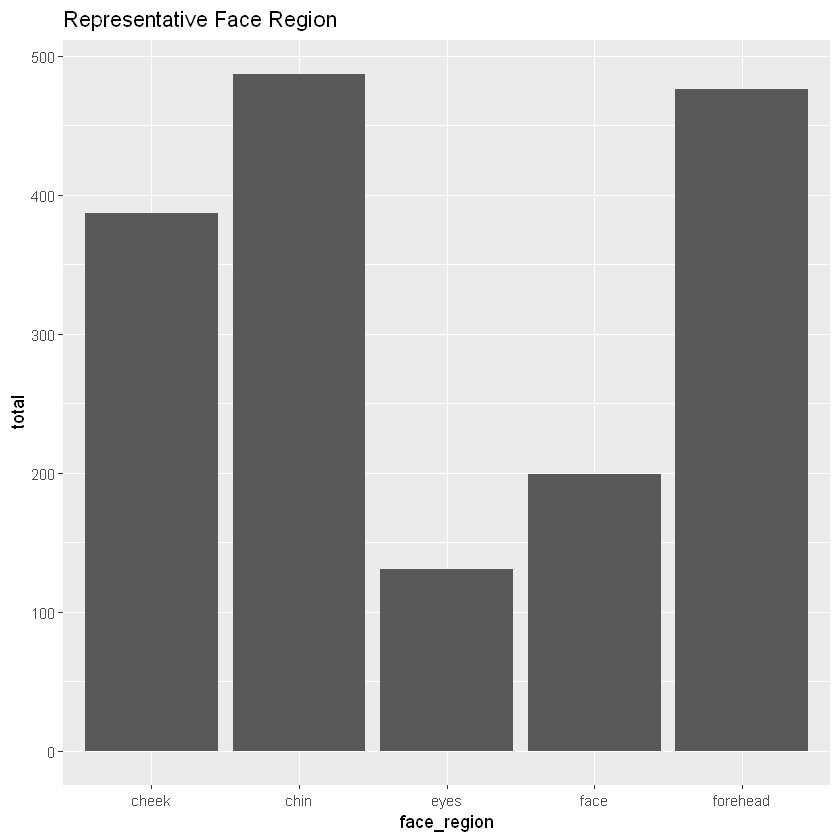

In [101]:
# 전체 결과 그래프로 확인

ggplot(df_total_faceregion2, aes(x=face_region, y=total))+geom_bar(stat="identity") + labs(title = "Representative Face Region")
# 1. 턱 / 2. 이마 / 3. 볼  순서의 결과를 얻었다
# 설문조사 결과를 토대로 턱이.. 얼굴 전체를 대표하는 색..
# 음... 대표색 정하는건 이렇게밖에 안될것같은데 더 생각해봐야할 문제
# 나중에 시간되면 그래프 색상도 바꿔보자 너무 칙칙해

    설문조사 결과를 토대로 
    얼굴 전체색을 대표하는 안면부위는 '턱'으로 선정
    (사실 설문조사 결과만을 보고서 대표는 턱이야 논문 틀렸어 하는건 좀 아닌것같은데 아직 그걸 설명할 방법을 모르겠다)
    
    그렇기에 앞으로 분석 방향은
    대표 안면부위 '턱'으로 설정하여 모든것을 진행할 것

### 성별에 따른 대표 안면부위 인식 차이 

    귀무가설 : 성별에 따라 대표 안면부위 인식 차이가 없다
    대립가설 : 성별에 따라 대표 안면부위 인식 차이가 있다
    
    - 대표 안면부위 : 턱
    - chisq.test 사용

In [2]:
# 데이터 불러오기

SAF_Face_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SAF_Face_cnt.csv")
str(SAF_Face_cnt)
head(SAF_Face_cnt)

'data.frame':	210 obs. of  10 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class: int  20 20 20 20 20 20 20 20 20 20 ...
 $ interest : int  5 5 3 3 4 2 5 3 4 4 ...
 $ class    : Factor w/ 2 levels "bright","harmony": 1 1 1 1 1 1 1 1 1 1 ...
 $ cheek    : int  3 1 2 1 2 3 2 1 2 1 ...
 $ forehead : int  2 2 1 2 3 2 2 1 2 2 ...
 $ chin     : int  1 2 3 2 3 3 2 2 3 2 ...
 $ eyes     : int  0 1 2 1 0 0 1 2 0 1 ...
 $ face     : int  2 2 0 2 0 0 1 2 1 2 ...


X,sex,age_class,interest,class,cheek,forehead,chin,eyes,face
0,Male,20,5,bright,3,2,1,0,2
1,Female,20,5,bright,1,2,2,1,2
2,Female,20,3,bright,2,1,3,2,0
3,Female,20,3,bright,1,2,2,1,2
4,Female,20,4,bright,2,3,3,0,0
5,Female,20,2,bright,3,2,3,0,0


In [3]:
## 데이터프레임 재생성

Male_T <- with(SAF_Face_cnt, sum(chin[sex=="Male"]))
Male_F <- with(SAF_Face_cnt, sum(cheek[sex=="Male"], forehead[sex=="Male"], eyes[sex=="Male"], face[sex=="Male"]))
Female_T <- with(SAF_Face_cnt, sum(chin[sex=="Female"]))
Female_F <- with(SAF_Face_cnt, sum(cheek[sex=="Female"], forehead[sex=="Female"], eyes[sex=="Female"], face[sex=="Female"]))

Male <- c(Male_T, Male_F)
Female <- c(Female_T, Female_F)

df_Sex_Region <- data.frame(Male, Female)
df_Sex_Region <- t(df_Sex_Region)
colnames(df_Sex_Region) <- c("True", "False")


## 행, 열 각각의 합계 알아보기

addmargins(df_Sex_Region)
# 합계값이 동일하지 않으므로 chisq.test 사용


## 카이제곱

chisq.test(df_Sex_Region)
# p-value = 0.6389  
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 성별에 따라 안면부위 인식 차이가 없음을 알 수 있다

,True,False,Sum
Male,137,351,488
Female,350,842,1192
Sum,487,1193,1680



	Pearson's Chi-squared test with Yates' continuity correction

data:  df_Sex_Region
X-squared = 0.22023, df = 1, p-value = 0.6389


### 성별에 따라 어떤 안면 부위를 제일 많이 선택했는지 알아보기

In [7]:
# 남
M_chin <- with(SAF_Face_cnt, sum(chin[sex=="Male"]))
M_cheek <- with(SAF_Face_cnt, sum(cheek[sex=="Male"]))
M_forehead <- with(SAF_Face_cnt, sum(forehead[sex=="Male"]))
M_eyes <- with(SAF_Face_cnt, sum(eyes[sex=="Male"]))
M_face <- with(SAF_Face_cnt, sum(face[sex=="Male"]))

# 여
F_chin <- with(SAF_Face_cnt, sum(chin[sex=="Female"]))
F_cheek <- with(SAF_Face_cnt, sum(cheek[sex=="Female"]))
F_forehead <- with(SAF_Face_cnt, sum(forehead[sex=="Female"]))
F_eyes <- with(SAF_Face_cnt, sum(eyes[sex=="Female"]))
F_face <- with(SAF_Face_cnt, sum(face[sex=="Female"]))

M <- c(M_chin, M_cheek, M_forehead, M_eyes, M_face)
F <- c(F_chin, F_cheek, F_forehead, F_eyes, F_face)

df_MF_Region <- data.frame(M, F)
df_MF_Region <- t(df_MF_Region)
colnames(df_MF_Region) <- c("chin", "cheek", "forehead", "eyes", "face")
df_MF_Region

,chin,cheek,forehead,eyes,face
M,137,110,138,36,67
F,350,277,338,95,132


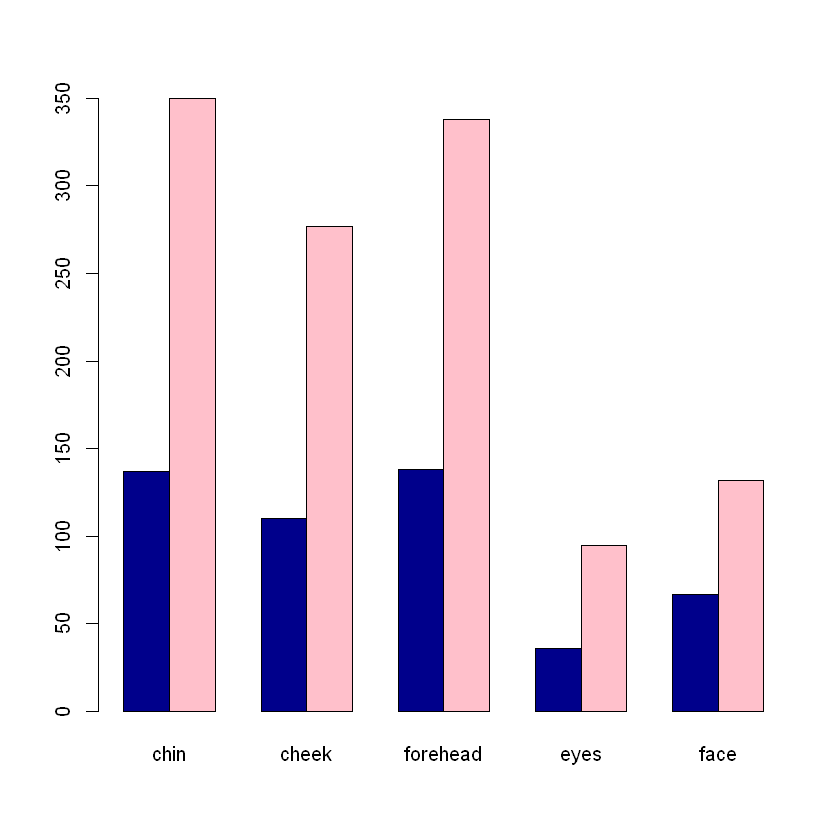

In [8]:
# 시각적으로 나타내기

barplot(df_MF_Region, col=c("darkblue", "pink"), beside=TRUE)
# 여성은 턱 > 이마 순 
# 남성은 이마 > 턱 순 (아주 미세한 차이로)

### 연령에 따른 대표 안면부위 인식 차이 

    귀무가설 : 연령에 따라 대표 안면부위 인식 차이가 없다
    대립가설 : 연령에 따라 대표 안면부위 인식 차이가 있다
    
    - 대표 안면부위 : 턱
    - chisq.test 사용

In [154]:
# 데이터 불러오기

SAF_Face_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SAF_Face_cnt.csv")
str(SAF_Face_cnt)
head(SAF_Face_cnt)

'data.frame':	210 obs. of  10 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class: int  20 20 20 20 20 20 20 20 20 20 ...
 $ interest : int  5 5 3 3 4 2 5 3 4 4 ...
 $ class    : Factor w/ 2 levels "bright","harmony": 1 1 1 1 1 1 1 1 1 1 ...
 $ cheek    : int  3 1 2 1 2 3 2 1 2 1 ...
 $ forehead : int  2 2 1 2 3 2 2 1 2 2 ...
 $ chin     : int  1 2 3 2 3 3 2 2 3 2 ...
 $ eyes     : int  0 1 2 1 0 0 1 2 0 1 ...
 $ face     : int  2 2 0 2 0 0 1 2 1 2 ...


X,sex,age_class,interest,class,cheek,forehead,chin,eyes,face
0,Male,20,5,bright,3,2,1,0,2
1,Female,20,5,bright,1,2,2,1,2
2,Female,20,3,bright,2,1,3,2,0
3,Female,20,3,bright,1,2,2,1,2
4,Female,20,4,bright,2,3,3,0,0
5,Female,20,2,bright,3,2,3,0,0


In [19]:
## 데이터프레임 재생성

teens_T <- with(SAF_Face_cnt, sum(chin[age_class=="10"]))
teens_F <- with(SAF_Face_cnt, sum(cheek[age_class=="10"], forehead[age_class=="10"], eyes[age_class=="10"], face[age_class=="10"]))
twenty_T <- with(SAF_Face_cnt, sum(chin[age_class=="20"]))
twenty_F <- with(SAF_Face_cnt, sum(cheek[age_class=="20"], forehead[age_class=="20"], eyes[age_class=="20"], face[age_class=="20"]))
thirty_T <- with(SAF_Face_cnt, sum(chin[age_class=="30"]))
thirty_F <- with(SAF_Face_cnt, sum(cheek[age_class=="30"], forehead[age_class=="30"], eyes[age_class=="30"], face[age_class=="30"]))
forty_T <- with(SAF_Face_cnt, sum(chin[age_class=="40"]))
forty_F <- with(SAF_Face_cnt, sum(cheek[age_class=="40"], forehead[age_class=="40"], eyes[age_class=="40"], face[age_class=="40"]))
fifty_T <- with(SAF_Face_cnt, sum(chin[age_class=="50"]))
fifty_F <- with(SAF_Face_cnt, sum(cheek[age_class=="50"], forehead[age_class=="50"], eyes[age_class=="50"], face[age_class=="50"]))

teens <- c(teens_T, teens_F)
twenty <- c(twenty_T, twenty_F)
thirty <- c(thirty_T, thirty_F)
forty <- c(forty_T, forty_F)
fifty <- c(fifty_T, fifty_F)
             
df_Age_Region <- data.frame(teens, twenty, thirty, forty, fifty)
df_Age_Region <- t(df_Age_Region)
colnames(df_Age_Region) <- c("True", "False")
# df_Age_Region


## 행, 열 각각의 합계 알아보기

addmargins(df_Age_Region)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱

chisq.test(df_Age_Region)
# p-value = 0.929
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 안면부위 인식 차이가 없음을 알 수 있다
# 엑셀로 비율 보니까 39 42 40 33 35 41 % 로.. 약간 다들 비슷한것 같긴하다..?

,True,False,Sum
teens,18,46,64
twenty,365,875,1240
thirty,69,171,240
forty,12,36,48
fifty,23,65,88
Sum,487,1193,1680



	Pearson's Chi-squared test

data:  df_Age_Region
X-squared = 0.86887, df = 4, p-value = 0.929


### 연령에 따라 어떤 안면 부위를 제일 많이 선택했는지 알아보기

In [260]:
library(tibble)
library(ggplot2)

In [361]:
# 연령에 따른 안면부위 선택 보기

A_chin <- c()
A_forehead <- c()
A_cheek <- c()
A_eyes <- c()
A_face <- c()


for(i in seq(10, 50, by=10)){
    
    chin1 <- with(SAF_Face_cnt, sum(chin[age_class==i]))
    A_chin[[(i/10)]] <- chin1
    
    forehead1 <- with(SAF_Face_cnt, sum(forehead[age_class==i]))
    A_forehead[[(i/10)]] <- forehead1
    
    cheek1 <- with(SAF_Face_cnt, sum(cheek[age_class==i]))
    A_cheek[[(i/10)]] <- cheek1
    
    eyes1 <- with(SAF_Face_cnt, sum(eyes[age_class==i]))
    A_eyes[[(i/10)]] <- eyes1
    
    face1 <- with(SAF_Face_cnt, sum(face[age_class==i]))
    A_face[[(i/10)]] <- face1
    
    Age_Face <- data.frame(chin=A_chin, forehead=A_forehead, cheek=A_cheek, eyes=A_eyes, face=A_face)
}


rownames(Age_Face) <- c("10대", "20대", "30대", "40대", "50대") # 왜 for문 안에선 안먹히냐
Age_Face <- rownames_to_column(Age_Face, var="Age")
Age_Face <- transform(Age_Face, chin =as.numeric(chin), forehead=as.numeric(forehead), cheek=as.numeric(cheek), eyes=as.numeric(eyes), face=as.numeric(face))
Age_Face

Age,chin,forehead,cheek,eyes,face
10대,18,19,16,2,9
20대,365,351,272,104,148
30대,69,72,59,13,27
40대,12,13,14,2,7
50대,23,21,26,10,8


In [368]:
# 시각적으로 나타내기
# 몰라 그래프 나중에 
# ggplot(Age_Face, aes(Age, fill=chin)) + geom_bar(position="dodge")
# 이거 보고 연령별로 뭐를 제일 많이 택했구나~ 하고 알아보자요

### 패션 관심도에 따른 대표 안면부위 인식 차이 

    귀무가설 : 패션 관심도에 따라 대표 안면부위 인식 차이가 없다
    대립가설 : 패션 관심도에 따라 대표 안면부위 인식 차이가 있다
    
    - 대표 안면부위 : 턱
    - chisq.test or kruskal.test 사용

In [303]:
# 데이터 불러오기

SAF_Face_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SAF_Face_cnt.csv")
str(SAF_Face_cnt)
head(SAF_Face_cnt)

'data.frame':	210 obs. of  10 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class: int  20 20 20 20 20 20 20 20 20 20 ...
 $ interest : int  5 5 3 3 4 2 5 3 4 4 ...
 $ class    : Factor w/ 2 levels "bright","harmony": 1 1 1 1 1 1 1 1 1 1 ...
 $ cheek    : int  3 1 2 1 2 3 2 1 2 1 ...
 $ forehead : int  2 2 1 2 3 2 2 1 2 2 ...
 $ chin     : int  1 2 3 2 3 3 2 2 3 2 ...
 $ eyes     : int  0 1 2 1 0 0 1 2 0 1 ...
 $ face     : int  2 2 0 2 0 0 1 2 1 2 ...


X,sex,age_class,interest,class,cheek,forehead,chin,eyes,face
0,Male,20,5,bright,3,2,1,0,2
1,Female,20,5,bright,1,2,2,1,2
2,Female,20,3,bright,2,1,3,2,0
3,Female,20,3,bright,1,2,2,1,2
4,Female,20,4,bright,2,3,3,0,0
5,Female,20,2,bright,3,2,3,0,0


In [316]:
# 패션 관심도에 따른 안면부위 선택 보기

A_chin <- c()
A_forehead <- c()
A_cheek <- c()
A_eyes <- c()
A_face <- c()


for(i in seq(1, 5, by=1)){
    
    chin1 <- with(SAF_Face_cnt, sum(chin[interest==i]))
    A_chin[[(i)]] <- chin1
    
    forehead1 <- with(SAF_Face_cnt, sum(forehead[interest==i]))
    A_forehead[[(i)]] <- forehead1
    
    cheek1 <- with(SAF_Face_cnt, sum(cheek[interest==i]))
    A_cheek[[(i)]] <- cheek1
    
    eyes1 <- with(SAF_Face_cnt, sum(eyes[interest==i]))
    A_eyes[[(i)]] <- eyes1
    
    face1 <- with(SAF_Face_cnt, sum(face[interest==i]))
    A_face[[(i)]] <- face1
    
    interest_Face <- data.frame(chin=A_chin, forehead=A_forehead, cheek=A_cheek, eyes=A_eyes, face=A_face)
}


rownames(interest_Face) <- c("1", "2", "3", "4", "5") 
interest_Face <- rownames_to_column(interest_Face, var="interest")
interest_Face

interest,chin,forehead,cheek,eyes,face
1,21,22,22,9,14
2,55,58,49,12,26
3,186,168,146,50,58
4,144,149,112,40,59
5,81,79,58,20,42


In [359]:
# chin vs etc

I_True <- c()
I_False <- c()

for(j in seq(1, 5, by=1)){
    
    True1 <- with(interest_Face, sum(chin[interest==j]))
    I_True[[(j)]] <- True1
    
    False1 <- with(interest_Face, sum(chin[interest==j], forehead[interest==j], eyes[interest==j], face[interest==j]))
    I_False[[(j)]] <- False1
    
    interest_TF <- data.frame(True=I_True, False=I_False)
}
    
interest_TF <- transform(interest_TF, True =as.numeric(True), False=as.numeric(False))
interest_TF

# 카이제곱

chisq.test(interest_TF)
# p-value = 0.8757
# 0.05보다 크므로 귀무가설 성립
# 패션 관심도에 따라 대표 안면부위 인식차이는 없다! 그렇다! 다 보는눈은 똑같다! 몰라

True,False
21,66
55,151
186,462
144,392
81,222



	Pearson's Chi-squared test

data:  interest_TF
X-squared = 1.2144, df = 4, p-value = 0.8757


In [374]:
# 패션관심도에 따른 대표 안면부위 선택한거 시각화 하기
# ggplot(interest_Face, aes(interest)) + geom_bar() 
# 이것도 나중에 하자.....ㅎ

## 최종 결론

    - 설문조사 결과 그래프로 시각화
        : 대표 안면 부위 '턱'으로 선정

    - 성별에 따른 안면부위 인식 차이
        : 카이제곱 이용, p-value 0.6389로 성별에 따른 안면부위 인식 차이 '없음'
        : 남 : 이마 > 턱 > 볼 ..
          여 : 턱 > 이마 > 볼 ..

    - 연령에 따른 안면부위 인식 차이
        : 카이제곱 이용, p-value 0.929로 연령에 따른 안면부위 인식 차이 '없음'
        : 10대 : 이마 > 턱 > 볼 ..
          20대 : 턱 > 이마 > 볼 ..
          30대 : 이마 > 턱 > 볼 ..
          40대 : 볼 > 이마 > 턱 ..
          50대 : 볼 > 턱 > 이마 ..

    - 패션 관심도에 따른 안면부위 인식 차이
        : 카이제곱 이용, p-value 0.8757로 패션 관심도에 따른 안면부위 인식 차이 '없음'
        : 1점 : 이마 = 볼 > 턱 ..
          2점 : 이마 > 턱 > 볼 ..
          3점 : 턱 > 이마 > 볼 ..
          4점 : 이마 > 턱 > 볼 ..
          5점 : 턱 > 이마 > 볼 ..
          
    => 논문에서는 대표 안면 부위가 '볼'이라고 지정하였다.
       하지만 우리의 설문조사 결과 사람들이 대표 안면색상이라고 지정한 부위는 '턱'
       
       성별, 연령, 패션관심도 에 따른 안면부위 인식 차이가 없으므로
       우리는 얼굴 색을 대표하는 안면 부위를 '턱'으로 놓고 개발을 진행해도 될 것이라 사료됨